<a href="https://colab.research.google.com/github/ToniYenC11/EmergingTech/blob/main/Programming_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 3

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
display(X.head())
display(y.head())

NameError: name 'X' is not defined

In [ ]:
# Converting label M and B to 1 and 0
y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0}).astype(int)
print(y.head())

In [ ]:
# Creating a correlation and check
x = x[['radius1', 'texture1', 'smoothness1', 'compactness1', 'symmetry1', 'fractal_dimension1']]

def plot_correlation_heatmap(data):
    plt.figure(figsize=(6, 6))
    sns.heatmap(data.corr().round(2), cmap='coolwarm', vmin=-1, vmax=1, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize": 7})
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Call the function to plot the heatmap
plot_correlation_heatmap(x)

In [ ]:
# Creatig Model Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=7)

In [ ]:
# Create a standard scaler and logistic regression pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Fit the pipeline to the training set
model.fit(x_train, y_train)

# Use the model to predict the values for the test set
y_pred = model.predict(x_test)

# Determine the training and testing accuracy
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

print(f"Training Accuracy: {round(train_accuracy, 2)}")
print(f"Testing Accuracy: {round(test_accuracy, 2)}")

# Show the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.94
Testing Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       107
           1       0.93      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # True Negatives, False Positives, False Negatives, True Positives

# Calculate the false alarm rate (False Positive Rate)
false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"False Alarm Rate: {round(false_alarm_rate, 2)}")

False Alarm Rate: 0.04


In [ ]:
# Show the coefficient values
coef_df = pd.DataFrame(model.named_steps.model.coef_[0], index=x.keys(), columns=['Coefficient'])
coef_df['Rounded'] = coef_df['Coefficient'].round(2)
print("\nCoefficient Values:")
print(coef_df)

# Show the intercept
print(f"Intercept: {model.named_steps.model.intercept_[0]:.2f}")


Coefficient Values:
                    Coefficient  Rounded
radius1                3.277395     3.28
texture1               1.195844     1.20
smoothness1            1.046129     1.05
compactness1           0.992227     0.99
symmetry1              0.498028     0.50
fractal_dimension1    -0.489562    -0.49
Intercept: -0.96


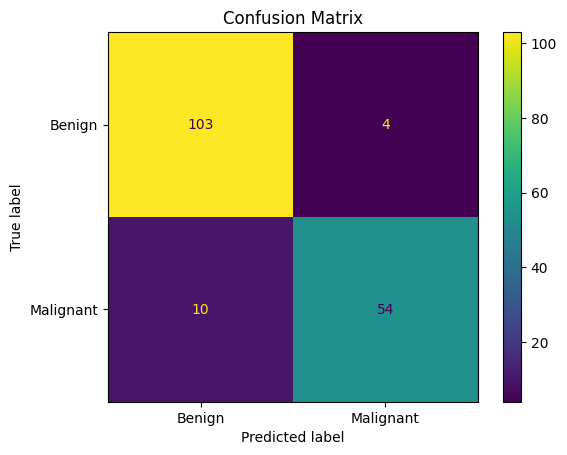

In [ ]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"]).plot()

# Add title and show the plot
plt.title('Confusion Matrix')
plt.show()

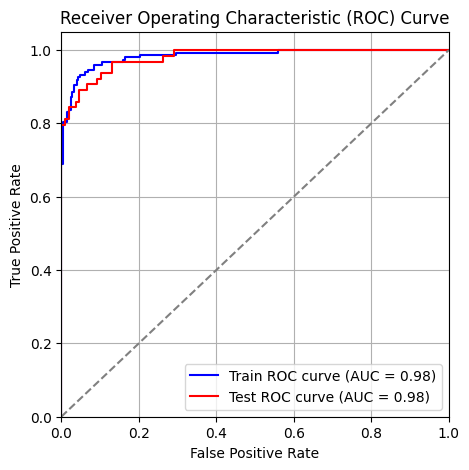

In [ ]:
# Compute ROC curve and AUC for training set
y_train_proba = model.predict_proba(x_train)[:, 1]  # Get probabilities for the positive class
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for testing set
y_test_proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Guide Questions

### 1. What steps are required to remove the "Sample code number" column?
- In the dataset the sample code was not provided. If ever tere is, dropping column by using Pandas dataframe function ".drop()"

### 2. How can the "Class" values be converted into binary (0 and 1) form in Python?

- As seen in the dataset, the values assigned to benign and malignant are 2 and 4, respectively. It can simply be  update the values in the Diagnosis column by dividing them by 2 and then subtracting 1, which can be expressed as Diagnosis = Diagnosis / 2 - 1. However there are other methods to convert the class in forms of binary

### 3. What is the importance of splitting the dataset into training and testing sets?

- Using the same datasets for both training and testing will result in overfitted results because the same data were used for both training the model for regression, and testing it for its accuracy score.

### 4. Why is it necessary to use the stratify parameter in the train_test_split function?

- `stratify` splits the data into a stratified fashion using the class labels. In the case of this dataset, the labels are based on the Diagnosis after several parameters.
- Some classification (and eventually regression) problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling.

### 5.What is logistic regression, and why is it suitable for this dataset?
- The labels are based on a classfication of either 0 or 1. For binary classification such as this, it is important to use a different function aside from a linear function because the relationship is not properly displayed due to the binary nature of the labels.
- **Logistic Regression** estimates the probability of a binary label based on a given data set of independent variables. THis is suitable for the experiment because the labels are either 0 or 1 (based on diagnosis), and a set of parameters is provided for prediction.

### 6. How can the training and testing accuracy of the logistic regression model be calculated?
- The `sklearn` module provides a documentation on Logistic Regression. The training and testing accuracy is based on the accuracy score using `model.score()` done on both training and testing set. For further evaluation of accuracy, AUC Score and ROC Score curves are also evaluated for both training and testing set.
- The goal is to observe the behavior of both sets, showing a supposed positive correlation between the two.

### 7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?

- The coefficients of:
  - radius1                3.277395     3.28
  - texture1               1.195844     1.20
  - smoothness1            1.046129     1.05
  - compactness1           0.992227     0.99
  - symmetry1              0.498028     0.50
  - fractal_dimension1    -0.489562    -0.49

### 8. How is a confusion matrix generated, and what does it represent?

- The confusion matrix is done by plotting the True Positive, True Negative, False Positive, and False Negatives of the dataset. Since it is a tedious manual process, `scikit-learn` has a built-in function for confusion matrix named `confusion_matrix`. It has a `ravel()` method to display the TP, TN, FP, and FN of the trainign set.
- The confusion matrix represents the correctly and incorrectly labeled dataset based on both the presence and absence of the binary labels. A patient can be diagnosed with the disease, but in actuality has no signs of said disease, making it a false positive.

### 9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?

- **Precision:** It is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Formula:
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
- Where:

    TP = True Positives;
    FP = False Positive

- **Recall:** It is the ratio of correctly predicted positive observations to all observations in actual class.
- Formula:
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
- Where:

    TP = True Positives;
    FN = False Negatives
    
- **F1-score** It is the weighted average of precision and recall. The best value is 1 (perfect precision and recall), and the worst is 0.
- F1-score provides a balance between precision and recall, useful when you have an uneven class distribution.
- Formula:

$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **False Alarm Rate:**  Also known as the False Positive Rate, it is the ratio of incorrectly predicted negative observations (False Positives) to the total actual negative observations (True Negatives and False Positives).
- Formula:
$$
\text{False Alarm Rate} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$
- Where:

    FP = False Positives;
    TN = True Negatives

### 10. Why are these metrics important for evaluating the performance of a classifier?

- These metrics are critical because they provide a more detailed analysis of how well the model is performing, beyond just the accuracy score.
- **Precision and Recall** give insight into how well the model handles false positives and false negatives, especially when dealing with imbalanced datasets.
-  **F1-score** balances the trade-off between precision and recall, helping ensure that both are considered in cases where one is more important than the other.
-  **False Alarm Rate** is important for understanding the model's ability to avoid false positives, especially in cases like medical diagnostics where false positives may lead to unnecessary treatments.

### 11. What is an ROC curve, and how is it plotted for a logistic regression model?

- **ROC Curve (Receiver Operating Characteristic Curve):** It is a graphical plot that illustrates the diagnostic ability of a binary classifier by plotting the True Positive Rate (Recall) against the False Positive Rate at various thresholds.
- As the decision threshold of a classifier is varied, the ROC curve shows how the model’s performance changes in terms of false positives and true positives.
- The ROC curve is typically plotted using:
  - **x-axis:** False Positive Rate (FPR)
    $$
    \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
    $$
  - **y-axis:** True Positive Rate (TPR), also known as Recall
    $$
    \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
    $$

- For plotting it for a logistic regression model:
model.
  - `predict_proba()`: This method returns the predicted probabilities for each class. The ROC curve is usually drawn for the positive class (malignant in your case).
  - `roc_curve()`: This function calculates the FPR and TPR for different threshold values.
  - `auc()`: Area Under the Curve gives a single score to evaluate the model, where higher AUC values represent better classification performance.

### 12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?

- **AUC (Area Under the Curve)** represents the area under the ROC curve. The AUC score provides an aggregate measure of performance across all classification thresholds.
- Interpretation:
  - AUC = 1: Perfect classifier
  - AUC = 0.5: No better than random guessing
  - AUC < 0.5: The model is worse than random guessing (this would be unusual in practice)
- AUC Significance: A higher AUC indicates a better model, as it implies that the classifier is more capable of distinguishing between the positive and negative classes. An AUC of 0.8 or higher is generally considered good in classification tasks.

### 13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?

- Comparison of Training and Testing ROC Curves:
  - The training ROC curve shows the model's ability to discriminate between classes on the data it was trained on.
  - The testing ROC curve shows how well the model generalizes to unseen data (i.e., the data that wasn't part of the training set).
- If the testing ROC curve is very close to the training ROC curve, it indicates that the model is likely not overfitting and is generalizing well.
- If the training ROC curve is much better than the testing curve, it might suggest overfitting (i.e., the model is memorizing the training data but not generalizing well to new data).
- If the testing ROC curve is far from the training curve, it could suggest underfitting (i.e., the model has not learned the underlying patterns well enough).


### 14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?

- The challenge encounter in this part was to pick the right correlation for the training the program. As we observed that radius column have 4 radius_1 to radius_4 upon checking the correlation the radius_1 fitted the most of it

### 15. If the model's performance is not satisfactory, what adjustments could be made to improve it?

- Well it will be by re-validation the dataset performing by splitting the data to training, validation, and test set.  
